In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Transactions

In [3]:
# File is >3 GB, only read in 1m rows
transactions = pd.read_csv('data/transactions_train.csv', nrows=1000000)

In [4]:
transactions.shape

(1000000, 5)

In [5]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   t_dat             1000000 non-null  object 
 1   customer_id       1000000 non-null  object 
 2   article_id        1000000 non-null  int64  
 3   price             1000000 non-null  float64
 4   sales_channel_id  1000000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 38.1+ MB


In [6]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


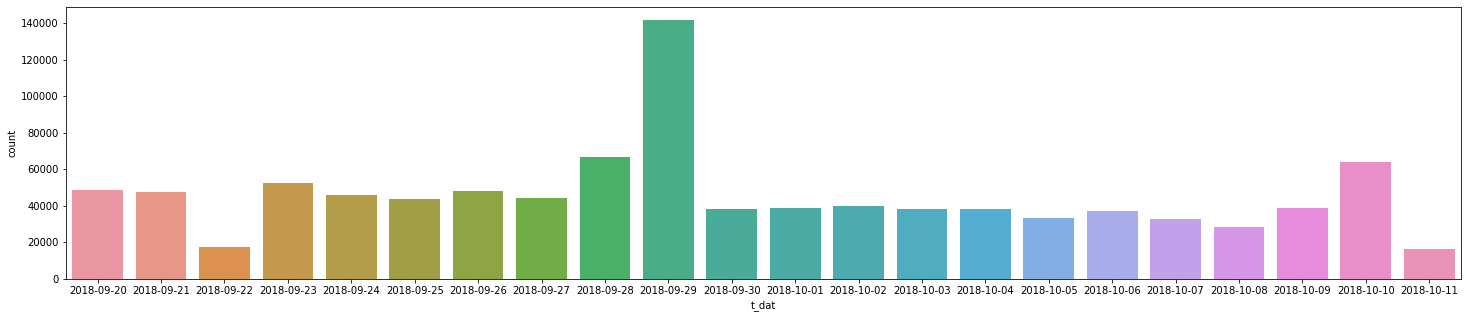

In [10]:
plt.figure(figsize=(25,5))
sns.countplot(x=transactions['t_dat'])

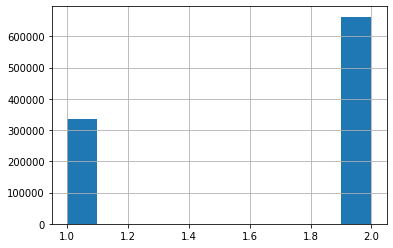

In [15]:
transactions['sales_channel_id'].hist()

In [16]:
transactions['price'].describe()

count    1000000.000000
mean           0.030179
std            0.022913
min            0.000678
25%            0.016932
50%            0.025407
75%            0.033881
max            0.591525
Name: price, dtype: float64

In [78]:
transactions[transactions['article_id']==663713001]

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
10026,2018-09-20,3681748607f3287d2c3a65e00bb5fb153de30e9becf158...,663713001,0.049475,2
14906,2018-09-20,4ef5967ff17bf474bffebe5b16bd54878e1d4105f7b4ed...,663713001,0.050831,2
20662,2018-09-20,6b7b10d2d47516c82a6f97332478dab748070f09693f09...,663713001,0.050831,1
26426,2018-09-20,8ac137752bbe914aa4ae6ad007a9a0c5b67a1ab2b2d474...,663713001,0.050831,2
...,...,...,...,...,...
940650,2018-10-10,529227e67a35c42a105a835e40ab76907edcd406b172ee...,663713001,0.040661,2
951587,2018-10-10,7de3982db06362c396e2fca5713b6fa1c976ec08940c2f...,663713001,0.040661,2
985610,2018-10-11,085fdcfe0e80cd65be1c1d1cc4b79b20e2c263d14d1e7d...,663713001,0.050831,2
991465,2018-10-11,2229ce49deedce84a6d50b3d9902006cd5c5b327f11f8d...,663713001,0.040678,1


In [79]:
transactions[transactions['article_id']==663713001].groupby('sales_channel_id')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
sales_channel_id,,,,,,,,
1,44.0,0.046266,0.004703,0.040661,0.040661,0.047017,0.050831,0.050831
2,100.0,0.050064,0.002613,0.036593,0.050831,0.050831,0.050831,0.050831


Since we only have the final transactions, we will need to create a negative sample

## Articles

In [17]:
articles = pd.read_csv('data/articles.csv')

In [18]:
articles.shape

(105542, 25)

In [19]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [20]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


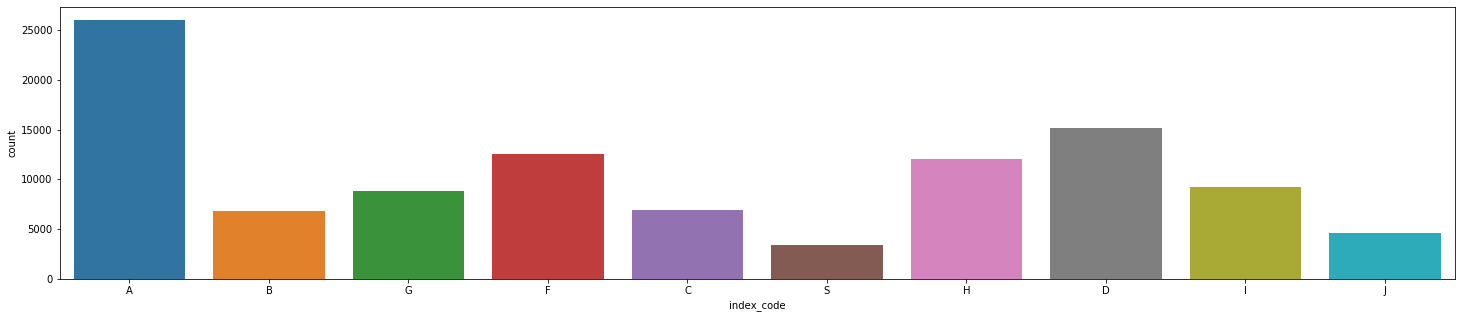

In [32]:
plt.figure(figsize=(25,5))
sns.countplot(articles['index_code'])

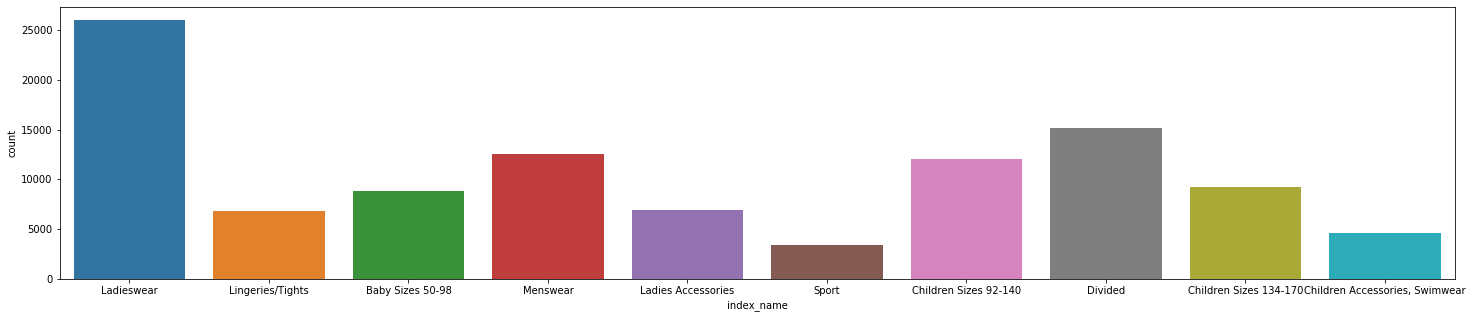

In [24]:
plt.figure(figsize=(25,5))
sns.countplot(articles['index_name'])

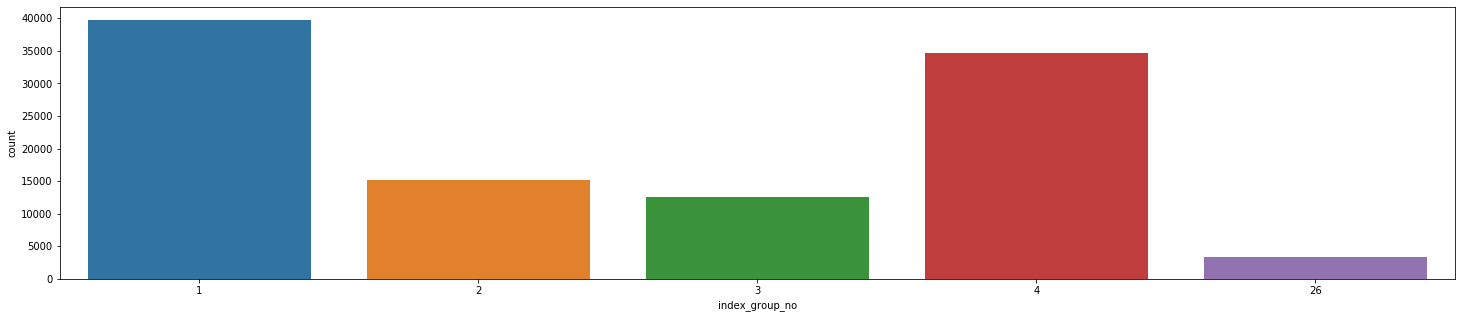

In [25]:
plt.figure(figsize=(25,5))
sns.countplot(articles['index_group_no'])

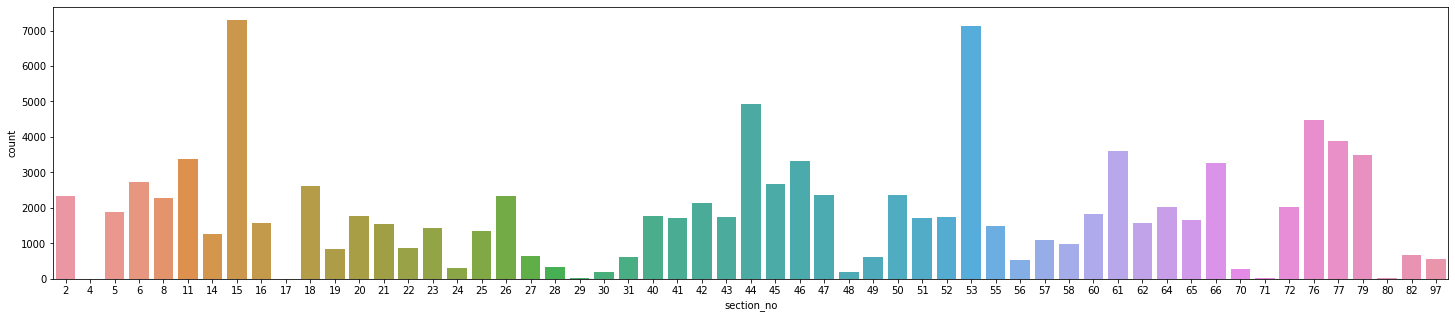

In [26]:
plt.figure(figsize=(25,5))
sns.countplot(articles['section_no'])

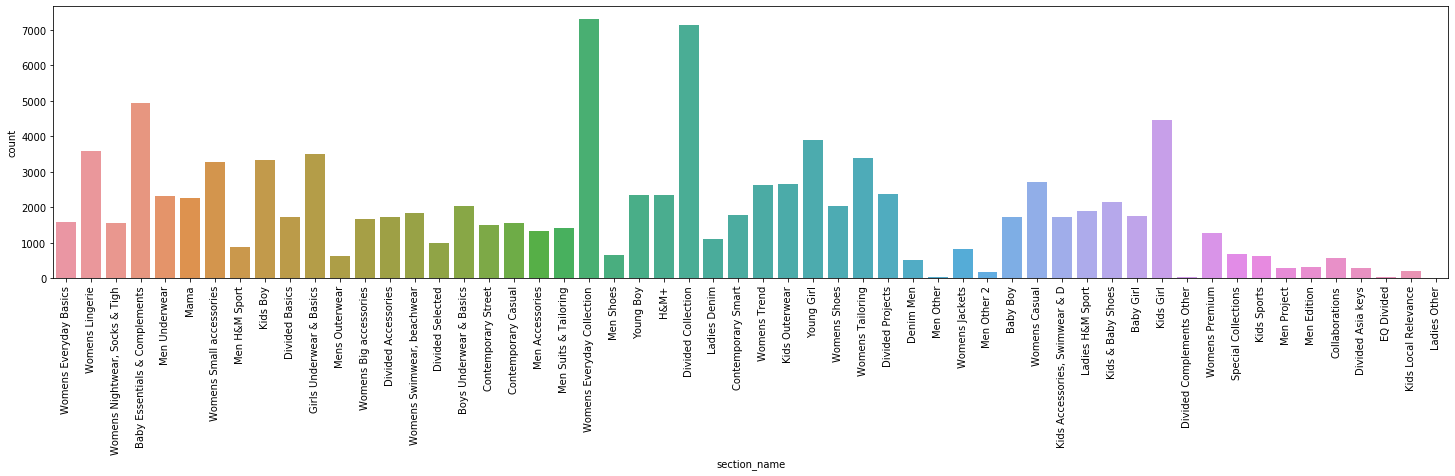

In [29]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
sns.countplot(articles['section_name'])


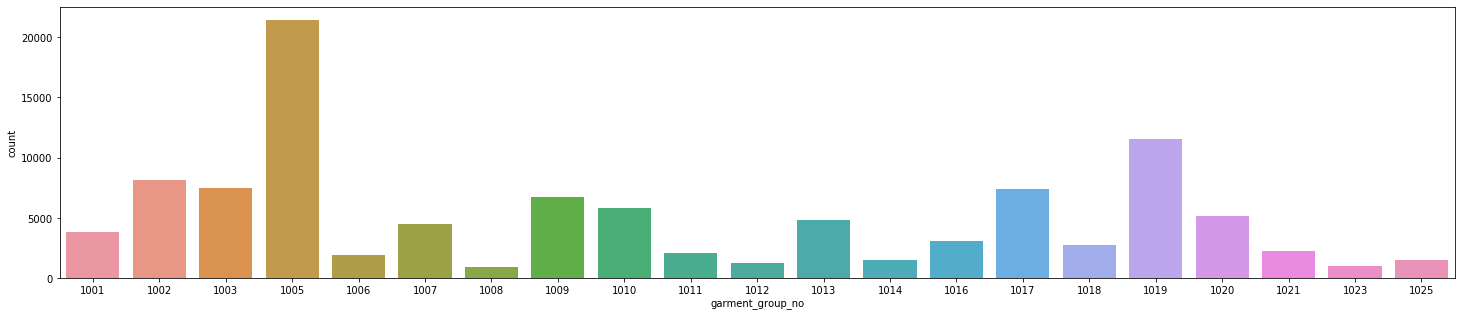

In [30]:
plt.figure(figsize=(25,5))
sns.countplot(articles['garment_group_no'])

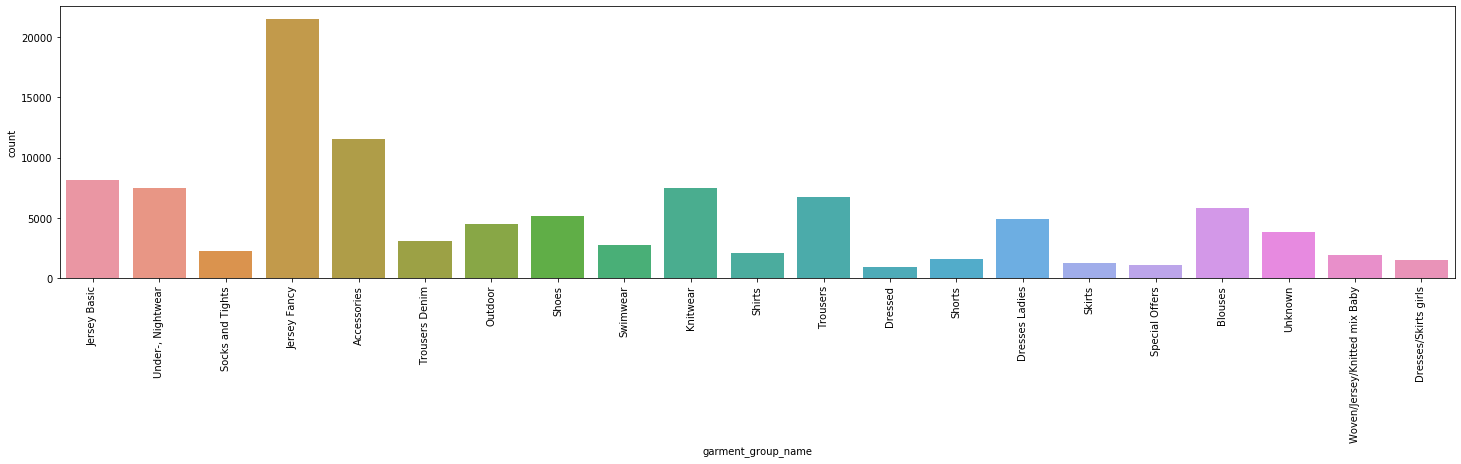

In [31]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
sns.countplot(articles['garment_group_name'])

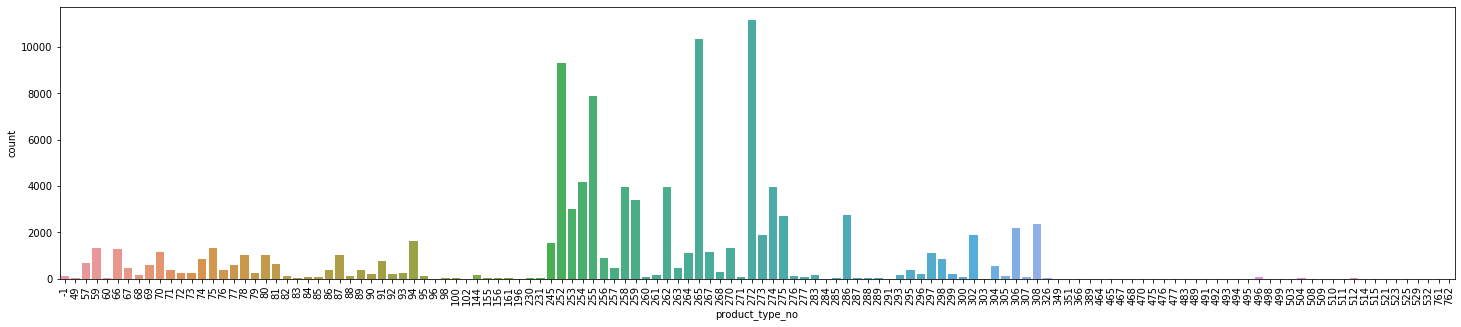

In [34]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
sns.countplot(articles['product_type_no'])

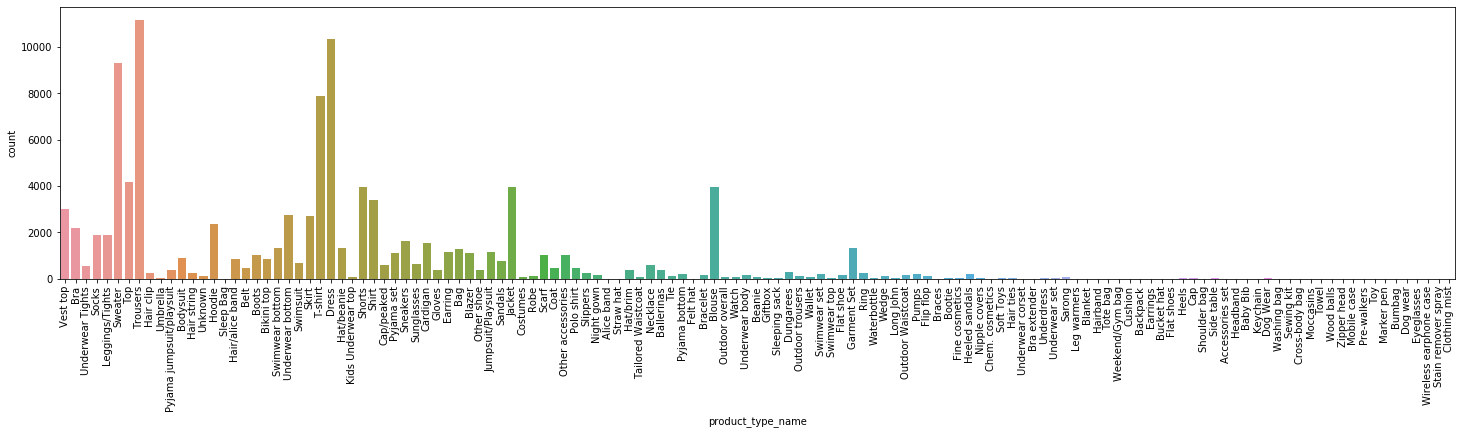

In [35]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
sns.countplot(articles['product_type_name'])

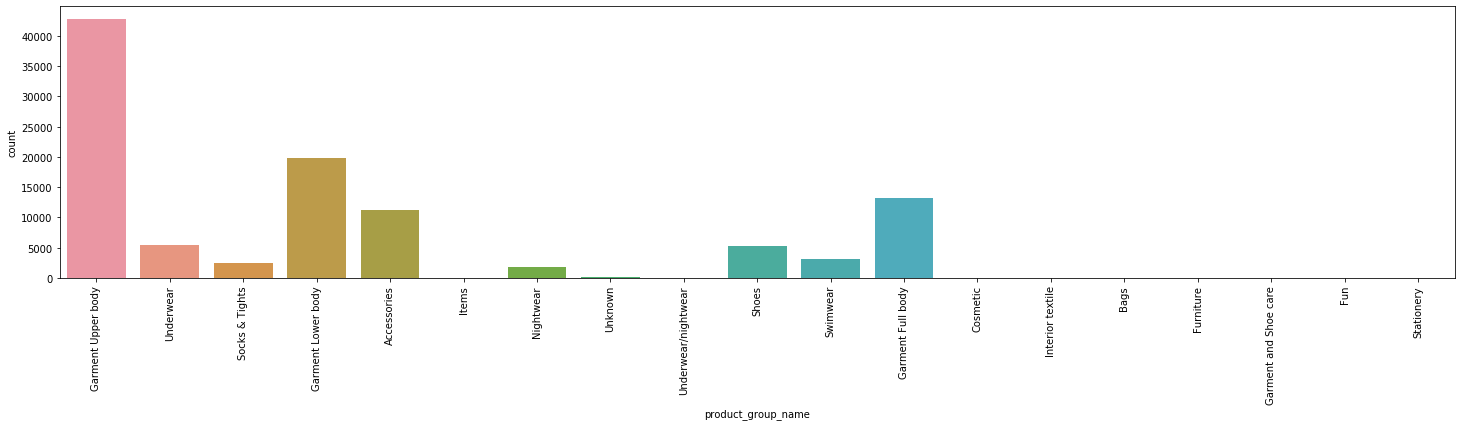

In [36]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
sns.countplot(articles['product_group_name'])

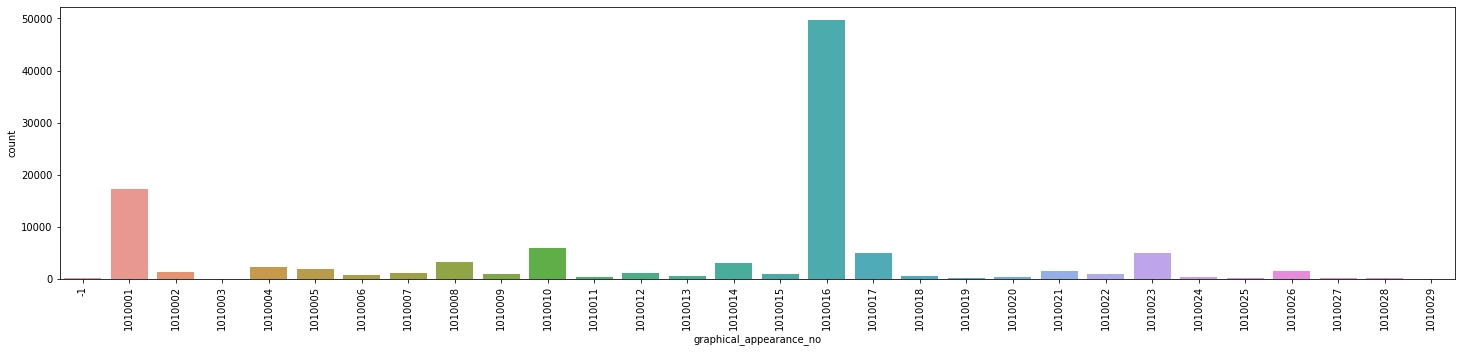

In [37]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
sns.countplot(articles['graphical_appearance_no'])

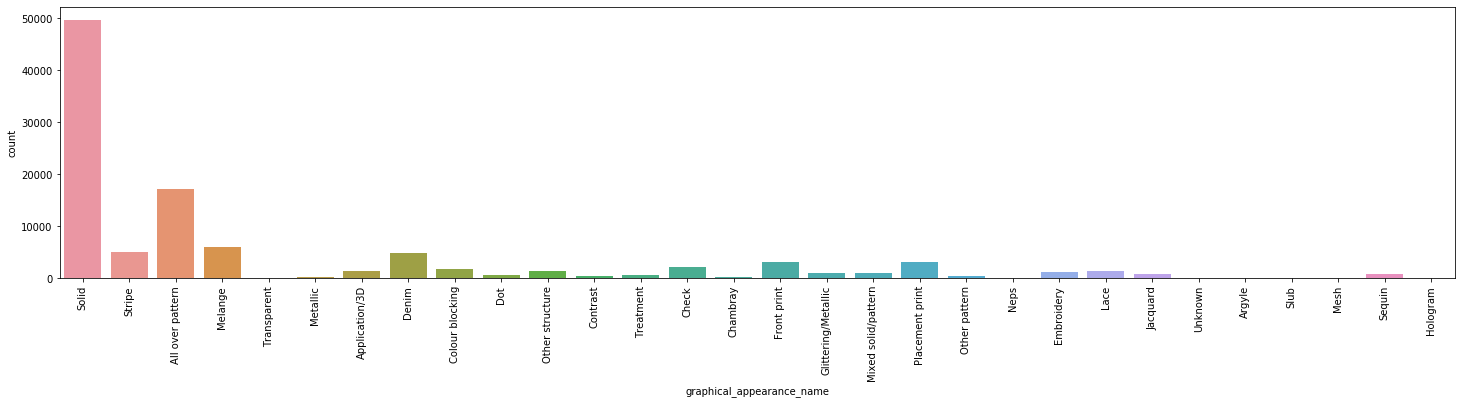

In [38]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
sns.countplot(articles['graphical_appearance_name'])

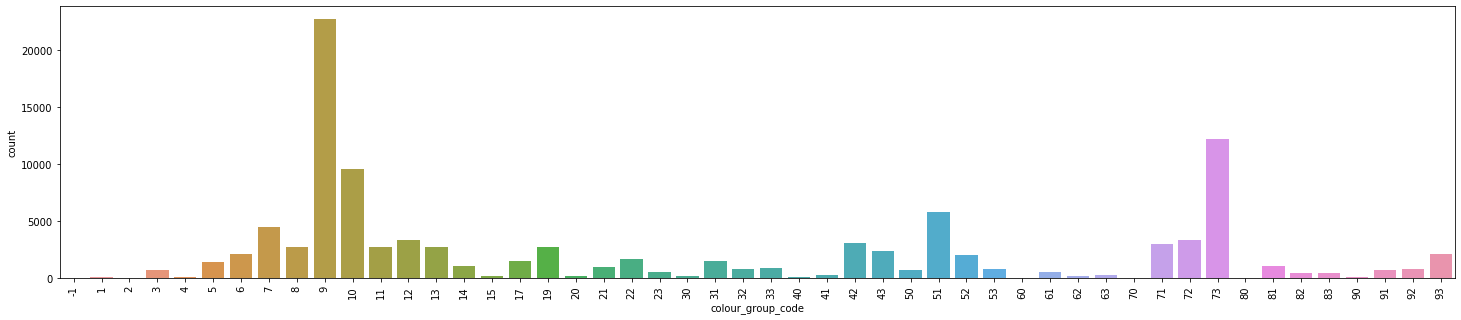

In [39]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
sns.countplot(articles['colour_group_code'])

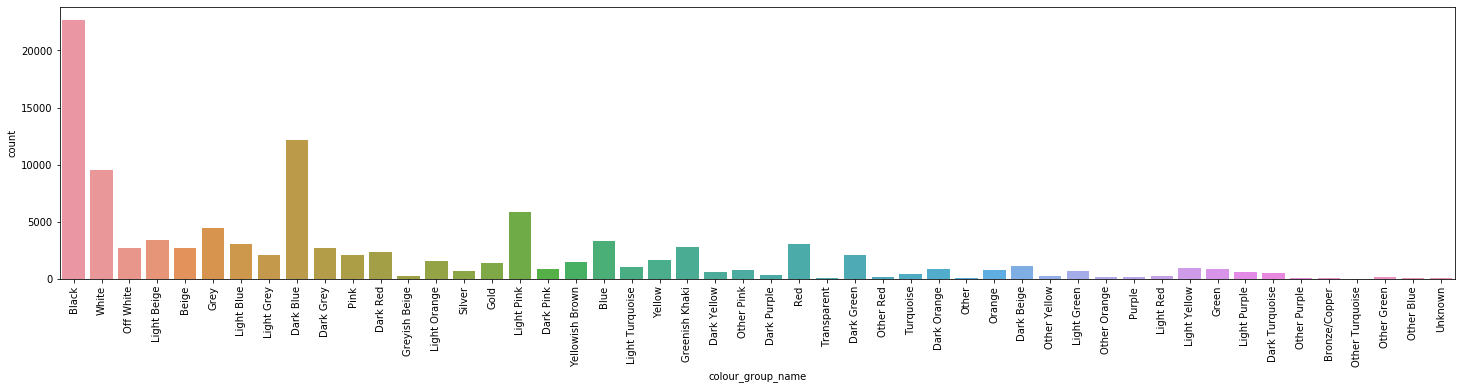

In [40]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
sns.countplot(articles['colour_group_name'])

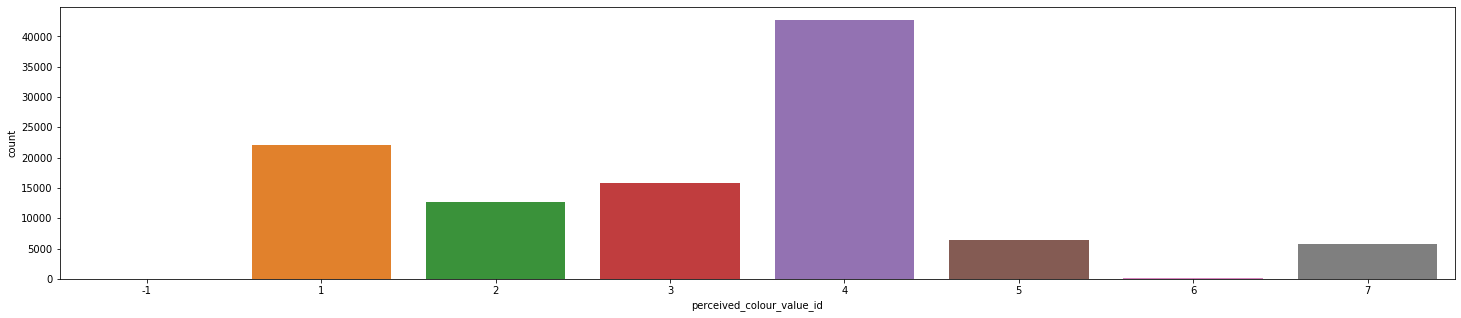

In [45]:
plt.figure(figsize=(25,5))
# plt.xticks(rotation=90)
sns.countplot(articles['perceived_colour_value_id'])

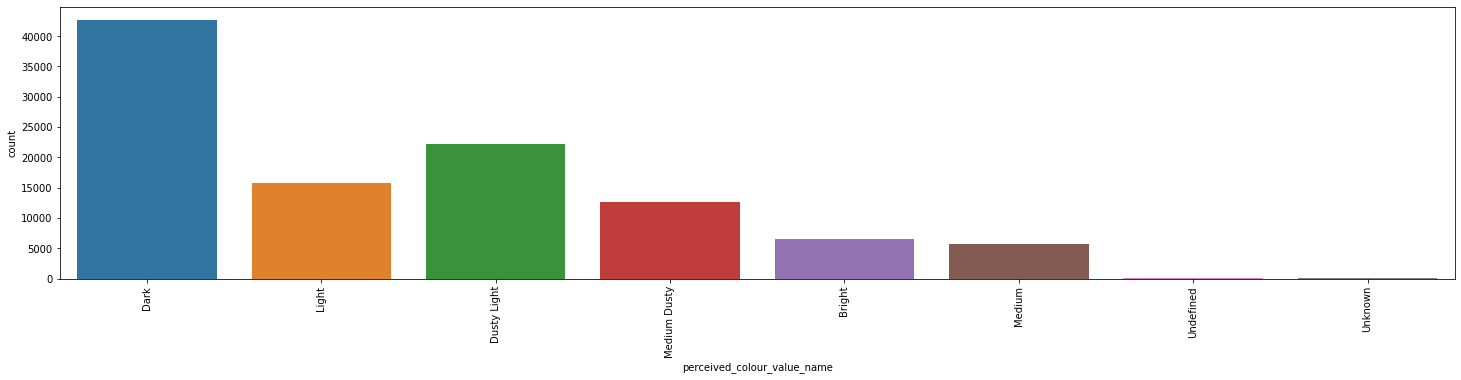

In [42]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
sns.countplot(articles['perceived_colour_value_name'])

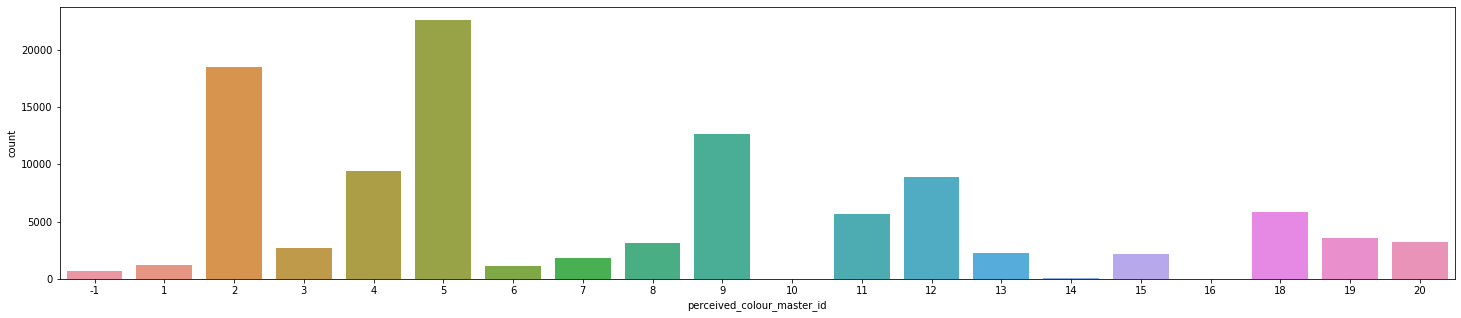

In [44]:
plt.figure(figsize=(25,5))
# plt.xticks(rotation=90)
sns.countplot(articles['perceived_colour_master_id'])

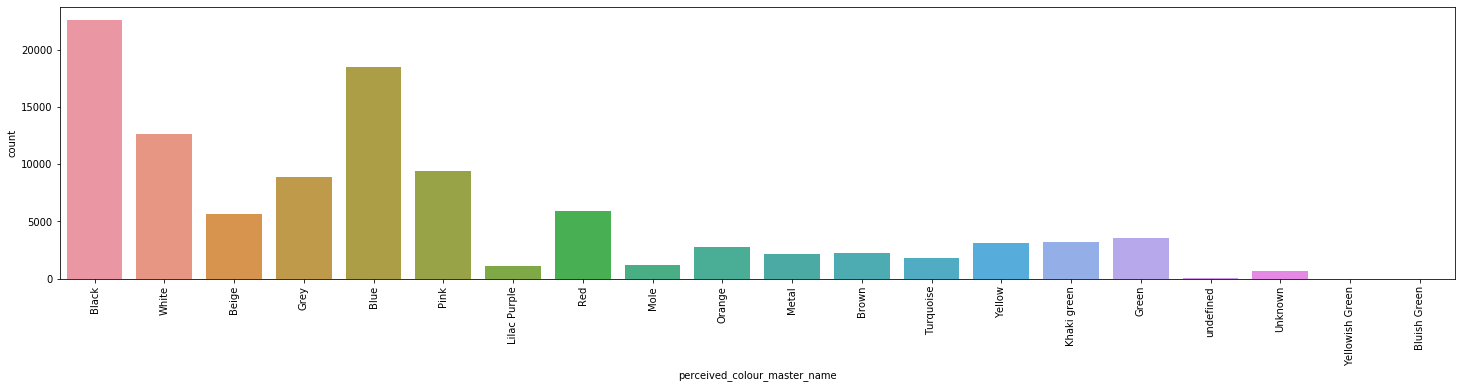

In [46]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
sns.countplot(articles['perceived_colour_master_name'])

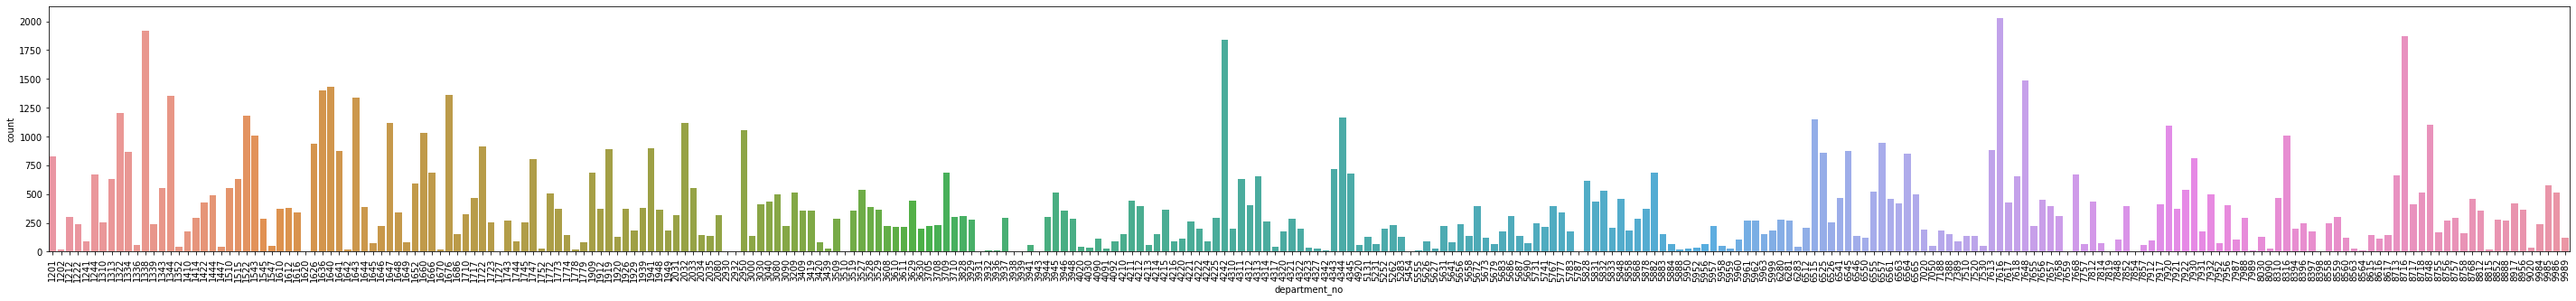

In [50]:
plt.figure(figsize=(50,5))
plt.xticks(rotation=90)
sns.countplot(articles['department_no'])

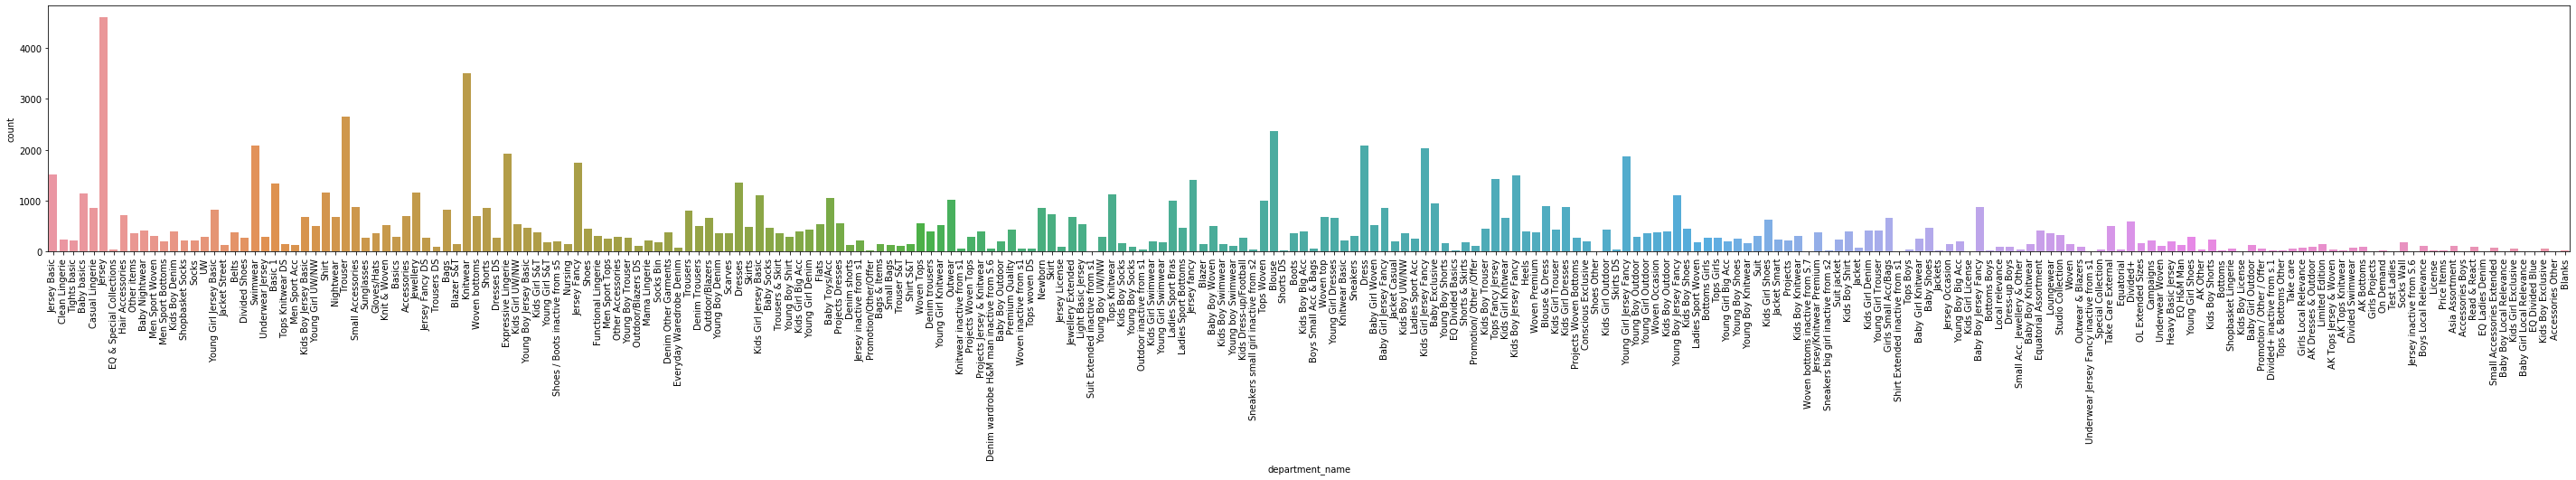

In [51]:
plt.figure(figsize=(50,5))
plt.xticks(rotation=90)
sns.countplot(articles['department_name'])

We can use the article similarities to create a negative sample

## Customers

In [52]:
customers = pd.read_csv('data/customers.csv')

In [53]:
customers.shape

(1371980, 7)

In [54]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [55]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [66]:
customers.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [59]:
customers['FN'].value_counts(dropna=False)

NaN    895050
1.0    476930
Name: FN, dtype: int64

In [60]:
customers['Active'].value_counts(dropna=False)

NaN    907576
1.0    464404
Name: Active, dtype: int64

In [67]:
customers[['FN', 'Active']].fillna(0).corr()

,FN,Active
FN,1.000000,0.979947
Active,0.979947,1.000000


In [68]:
customers['fashion_news_frequency'].value_counts(dropna=False)

NONE         877711
Regularly    477416
NaN           16009
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

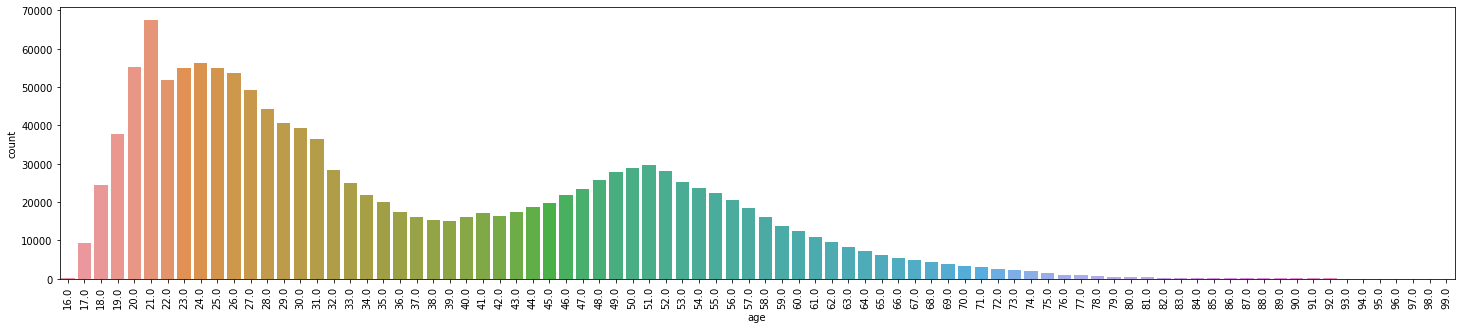

In [72]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
sns.countplot(x=customers['age'])

In [70]:
customers['age'].describe()

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

In [71]:
customers['age'].mode()

0    21.0
dtype: float64

From the bimodal distribution, it seems likely the typical shoppers are 1) early to mid-twenties or 2) the parent of a teen

In [73]:
customers[customers['age'].isna()].head(20)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,NaN,NaN,NaN,NaN,NaN,2c29ae653a9282cce4151bd87643c907644e09541abc28...
54,0002b9088196900626214bcdc6d5f3d85f38fb462a4806...,NaN,NaN,ACTIVE,NONE,NaN,db2cef710598164a99187237dd049b68502590eeb41ca3...
99,0004690d2b68d5175697d197a86065595ef7b49c7c051b...,NaN,NaN,PRE-CREATE,NONE,NaN,d831ea0a55a7a7af0e3ff9da0d370e225242bbc7999d78...
138,0005cd85a6220e1f1c582c7ff9175efe7d7c16d184c5ba...,NaN,NaN,ACTIVE,NONE,NaN,ee66d2b71f2fe333bee3e0f4a2dbac1fcf022e0df38763...
148,00060d2f1e63f2b95268b8573996b9aa5612a3efc97c71...,NaN,NaN,PRE-CREATE,NONE,NaN,f2288fb8f9b8ee2c3e56d6aa813d2a22f820cdfabf27a6...
229,000a5f3c8be9167cb0d09dd8a17b6b54998e9e83faaf52...,NaN,NaN,PRE-CREATE,NONE,NaN,69fa89d2815afb4ab4ea461a077a76e4b25f30afc43f4e...
290,000da3d7d0ef65573d455266b21b085483913d296f65cc...,NaN,NaN,PRE-CREATE,NONE,NaN,c9a22609dbb596e7d97f3eac937fb5970b9e27057f71a2...
509,0017be89382ce22b2caf9b33aa26bef73c18abbffd9dd6...,NaN,NaN,PRE-CREATE,NONE,NaN,d4a0da028aff454c5facf15b7a5088fd243b505f2ae320...
592,001b6f3f3365fe335f8a3b818eb60b1ccd6c764707d73a...,1.0,1.0,ACTIVE,Regularly,NaN,91893f5d5e1aa5677545f2e8e2cfa26be0f0aa6c766d28...
615,001c9cf3869156c0f7691ac577914b5c38f56ba33728c8...,1.0,1.0,ACTIVE,Regularly,NaN,c6f90b518b18072b932ed9c2de8a0b879372bad296bc5a...


In [75]:
customers['club_member_status'].value_counts(dropna=False)

ACTIVE        1272491
PRE-CREATE      92960
NaN              6062
LEFT CLUB         467
Name: club_member_status, dtype: int64

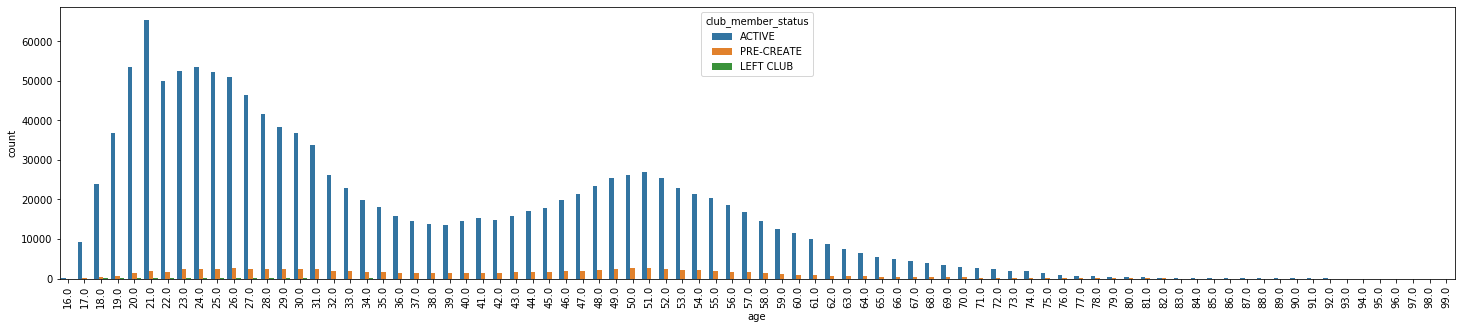

In [76]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=90)
sns.countplot(x=customers['age'], hue=customers['club_member_status'])

In [77]:
customers.groupby('club_member_status')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
club_member_status,,,,,,,,
ACTIVE,1266255.0,36.077991,14.305258,16.0,24.0,31.0,48.00,99.0
LEFT CLUB,464.0,33.989224,13.851959,17.0,23.0,29.0,44.25,78.0
PRE-CREATE,85624.0,40.885313,13.683163,16.0,29.0,41.0,52.00,99.0
